# Quantum Computing 1

**Author:** Gavin DeBrun

In [ ]:
!pip3 install qiskit[visualization]

In [ ]:
import qiskit
from qiskit import *
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt

In [ ]:

# first do 
IBMQ.save_account("00e972b66a800549589ee0d23c07aed4914ae87440992a8224b6fa370f9061d417aff1f96dea234eedd7ff84eaa2b547ccce2fac323079527be94803c49b39bf") #run this only once 
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
def RunMe(qc,num_shots=1024):
    '''Get shot output for a quantum circuit'''
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend,shots=num_shots)
    result = job.result()
    return result

def RunMeState(qc):
    '''Get statevector output of a circuit'''
    qcc = qc.copy()
    qcc.remove_final_measurements() #make sure we'll get a statevector
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qcc, backend,shots=1)
    result = job.result()
    return result

def RunMeQC(qc):
    '''Run a circuit on a quantum computer'''
    provider = IBMQ.get_provider(hub='ibm-q')
    from qiskit.providers.ibmq import least_busy
    small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                       and not x.configuration().simulator)
    backend = least_busy(small_devices)
    jobReal = execute(qc, backend)
    return jobReal


def StateToBinary(b):
    '''Takes a statevector and produces a binary representation'''
    wires=int(round(np.log2(len(b))))
    for i in range(0,2**wires):
        myFormat="0"+str(wires)+"b"
        if np.abs(b[i])!=0:
            print(b[i],'|',format(i, myFormat)[::-1],'>')
def saveJob(job):
    print("jobLoad = loadJob('{}','{}')".format(job.job_id(),job.backend().name()))
def loadJob(job_id,name):
    provider    = IBMQ.get_provider('ibm-q')
    thisBackend = provider.get_backend(name)
    return thisBackend.retrieve_job(job_id)

## 1: A Single Qubit

In [ ]:
qc = QuantumCircuit(2)
qc.draw(output='mpl')

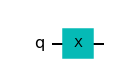

In [ ]:
quantumWires=1
qc = QuantumCircuit(quantumWires)
qc.x(0) # this is a quantum NOT Gate.
qc.draw(output='mpl') #to draw this needs to be the last command

In [ ]:
results=RunMeState(qc)
StateToBinary(results.get_statevector())

(1+0j) | 1 >


(1+0j) | 0 >


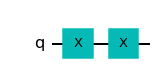

In [ ]:
qc.x(0)
results=RunMeState(qc)
StateToBinary(results.get_statevector())
qc.draw(output='mpl') #to draw this needs to be the last command

(0.7071067811865476+0j) | 0 >
(0.7071067811865475+0j) | 1 >


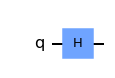

In [ ]:
qc = QuantumCircuit(quantumWires)
qc.h(0)

results=RunMeState(qc)
StateToBinary(results.get_statevector())
qc.draw(output='mpl')

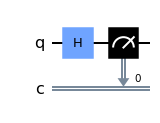

In [ ]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure([0],[0])
qc.draw(output='mpl')
qc.cnot

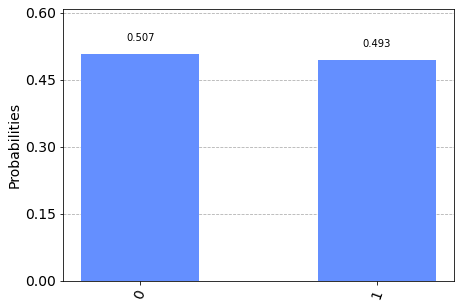

In [ ]:
results=RunMe(qc)
plot_histogram(results.get_counts())

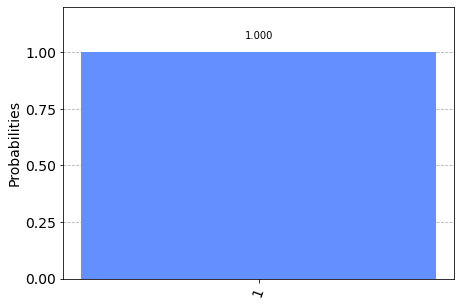

In [ ]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure([0],[0])
results = RunMe(qc)
plot_histogram(results.get_counts())

You should see that the circuit with the "hadamard" gates gives half $|0\rangle$ and half $|1\rangle$ whereas the "not" gate always gives $|1\rangle$

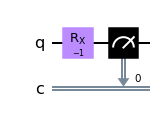

In [ ]:
qc = QuantumCircuit(1,1)
qc.rx(-2*.5,0)
qc.measure([0],[0])
results = RunMe(qc)
qc.draw(output='mpl')

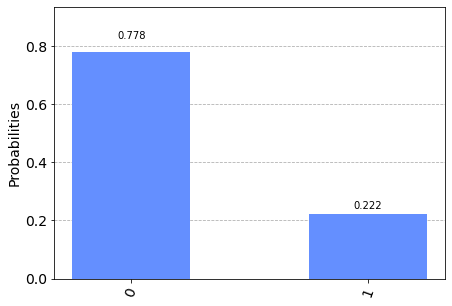

In [ ]:
plot_histogram(results.get_counts())

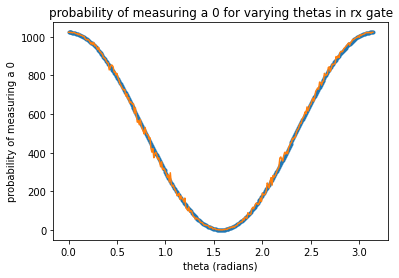

In [ ]:
myData=[]
thetas=np.arange(0,np.pi,0.01)
for theta in thetas:
  qc = QuantumCircuit(1,1)
  qc.rx(-2*theta, 0)
  qc.measure([0],[0])
  results = RunMe(qc)
  
  if '0' in results.get_counts():
    myData.append(results.get_counts()['0'])
  else:
    myData.append(0)
plt.plot(thetas,1024*np.cos(thetas)**2,'.')
plt.plot(thetas,myData)
plt.xlabel("theta (radians)")
plt.ylabel("probability of measuring a 0")
plt.title('probability of measuring a 0 for varying thetas in rx gate')
plt.show()

## Two qubits

### a. Control-not gates

(1+0j) | 00 >


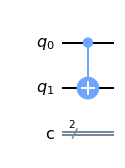

In [ ]:
qc = QuantumCircuit(2,2)
qc.cx(0,1)
results=RunMeState(qc)
StateToBinary(results.get_statevector())
qc.draw(output='mpl')

(1+0j) | 11 >


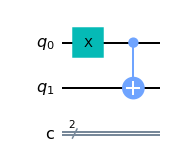

In [ ]:
c = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
results=RunMeState(qc)
StateToBinary(results.get_statevector())
qc.draw(output='mpl')

### b.  Build an EPR Pair

(0.7071067811865476+0j) | 00 >
(0.7071067811865475+0j) | 11 >


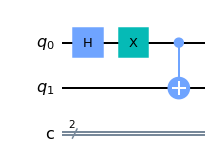

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(0)
qc.cx(0,1)

results=RunMeState(qc)
StateToBinary(results.get_statevector())
qc.draw(output='mpl')

### c. Measuring EPR Pairs

(0.7071067811865476+0j) | 00 >
(0.7071067811865475+0j) | 11 >


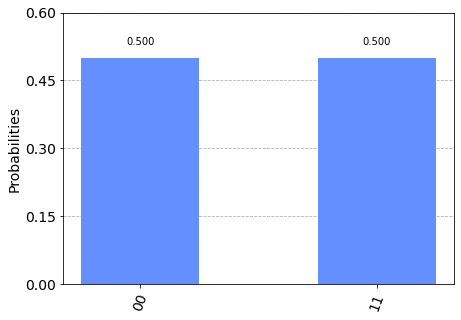

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
results=RunMeState(qc)
StateToBinary(results.get_statevector())
plot_histogram(results.get_counts())

### d. Running on an actual Quantum Computer

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
job = RunMeQC(qc)

In [ ]:
print(job.status())
print(job.queue_position())
saveJob(job)

NameError: ignored

JobStatus.DONE


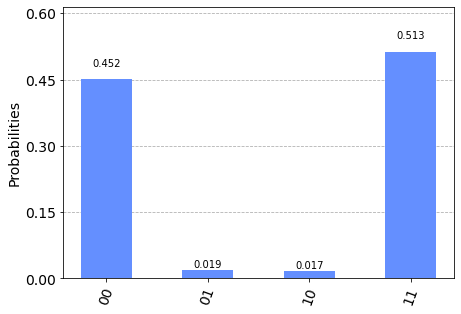

In [ ]:
job = loadJob('5fc5eb02e15c3b00192d5824','ibmq_santiago')
#print(job.status())
plot_histogram(job.result().get_counts())

### e. Entanglement 

For EPR the probability difference is: 0.23150634765625
The EPR pair is entangled



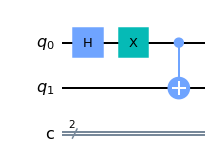

In [ ]:

def wire_i_probability(myCounts,wire):
    zeroProb=0.0
    if wire==0:
        if "00" in myCounts:
          zeroProb += myCounts["00"]
        if "01" in myCounts:
          zeroProb += myCounts["01"]
    elif wire==1:
        if "00" in myCounts:
          zeroProb += myCounts["00"]
        if "10" in myCounts:
          zeroProb += myCounts["10"]
    return zeroProb/1024. #1024 because RunMe() defaults to 1024

def wires_probability(myCounts):
  if "00" in myCounts:
    return myCounts["00"]/1024

def areEntangled(myCounts, type):
  probabilityDifference = np.abs(wires_probability(myCounts) - wire_i_probability(myCounts, 0) * wire_i_probability(myCounts, 1))
  print("For " + type, "the probability difference is:", probabilityDifference)

  if  probabilityDifference > .01:
    return True
  else:
    return False

#Using the actual quantum computer results for the EPR pair
EPR = loadJob('5fc5eb02e15c3b00192d5824','ibmq_santiago')

if (areEntangled(EPR.result().get_counts(), "EPR")):
  print("The EPR pair is entangled")
else:
  print("The EPR pair is not entangled")

#just building the ciruit again to print it
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(0)
qc.cx(0,1)
print()
qc.draw(output='mpl')

For hadamard and not gates on one wire the probability difference is: 0.0009756088256835938
The hadamard and not combination does not produce an entangled pair of qubits



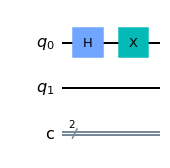

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(0)
results=RunMeState(qc)
if areEntangled(results.get_counts(), "hadamard and not gates on one wire"):
  print("The hadamard and not comibation produces an entangled pair of qubits")
else:
  print("The hadamard and not combination does not produce an entangled pair of qubits")
print()
qc.draw(output='mpl')

## Quantum Key Distribution

### a. One time pads

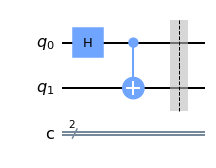

In [ ]:


def MakeSinglet(qc):
    aliceWire=0
    bobWire=1
    qc.h(aliceWire)
    qc.cx(aliceWire,bobWire)

def MakeSharedState(qc):
    MakeSinglet(qc)
    qc.barrier()
    return qc

qc=QuantumCircuit(2,2)
qc=MakeSharedState(qc)
qc.draw(output='mpl')

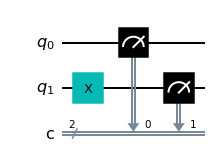

In [ ]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')


In [ ]:
result = RunMe(qc,1)
theKey=list(result.get_counts().keys())[0]
print("the key output is =",theKey)
q0 = theKey[-1]
q1 = theKey[-2]
### OR:
### q1,q0 = theKey
print("q0 state is",q0,"and q1 state is",q1)

the key output is = 10
q0 state is 0 and q1 state is 1


In [ ]:
aliceBits=[]
bobBits=[]

qc=QuantumCircuit(2,2)
qc=MakeSharedState(qc)

qc.measure([0,1],[0,1])

## After measurement how often do Alice and Bob's bits agree.
num_agree = 0
for i in range (100):
  results = RunMe(qc,1)
  theKey = list(results.get_counts().keys())[0]
  aliceBits.append(theKey[-2])
  bobBits.append(theKey[-1])
  if theKey[-1] == theKey[-2]:
    num_agree += 1
print("They agree this fraction of the time:", num_agree/100) #fill this 


They agree this fraction of the time: 1.0


### b. Eve's arrival

Alice and Bob agree this fraction of the time: 1.0
Alice and Eve agree this fraction of the time: 1.0


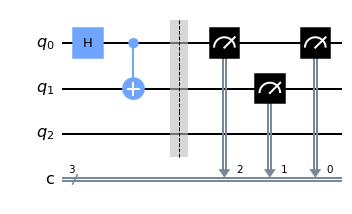

In [ ]:

AliceBits=[]
EveBits=[]
BobBits=[]
eveWire=2
qc=QuantumCircuit(3,3)
qc=MakeSharedState(qc)
###What can Eve do here so that she knows the secret bit and can't be detected by Alice and Bob
qc.measure(0,2)
### Eve is done now. 
qc.measure([0,1],[0,1])  #this is your measure from earlier. 

###How often do Alice and Bob's bits agree.
### How often do Alice and Eve's bits agree.
bob_alice = 0
alice_eve = 0
for i in range(100):
  results = RunMe(qc,1)
  theKey = list(results.get_counts().keys())[0]
  AliceBits.append(theKey[-3])
  BobBits.append(theKey[-2])
  EveBits.append(theKey[-1])
  if theKey[-3] == theKey[-2]:
    bob_alice += 1
  if theKey[-3] == theKey[-1]:
    alice_eve += 1
print("Alice and Bob agree this fraction of the time:", bob_alice/100)
print("Alice and Eve agree this fraction of the time:", alice_eve/100)
qc.draw(output='mpl')

### c. An improved protocol

Alice and Bob agree this fraction of the time: 0.4


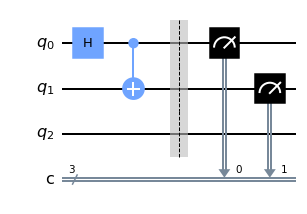

In [ ]:
aliceBits = []
bobBits = []
num_agree = 0
hadamard = np.zeros(100)
for i in range(100):
  qc = QuantumCircuit(3,3)
  qc = MakeSharedState(qc)
  coin_flip = np.random.random()
  if coin_flip > .5:
    hadamard[i] = 1
    qc.h(0)
    qc.h(1)
  qc.measure([0,1],[0,1])
  results = RunMe(qc,1)
  theKey = list(results.get_counts().keys())[0]
  aliceBits.append(theKey[-3])
  bobBits.append(theKey[-2])
  if theKey[-3] == theKey[-2]:
    num_agree += 1
print("Alice and Bob agree this fraction of the time:", num_agree/100)
qc.draw(output='mpl')

### d. Eve in the improved protocol

Alice and Bob agree this fraction of the time: 0.69
Alice and Eve agree this fraction of the time: 0.67
The bits sent when Hadamard gates were added are still viable.


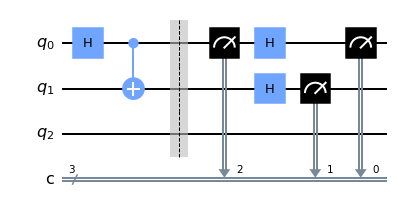

In [ ]:

aliceBits = []
bobBits = []
eveBits = []
alice_bob = 0
alice_eve = 0
hadamard = np.zeros(100)
for i in range(100):
  qc = QuantumCircuit(3,3)
  qc = MakeSharedState(qc)
  qc.measure(0,2)
  coin_flip = np.random.random()
  if coin_flip > .5:
    hadamard[i] = 1
    qc.h(0)
    qc.h(1)
  qc.measure([0,1],[0,1])
  results = RunMe(qc,1)
  theKey = list(results.get_counts().keys())[0]
  aliceBits.append(theKey[-3])
  bobBits.append(theKey[-2])
  eveBits.append(theKey[-1])
  if theKey[-3] == theKey[-2]:
    alice_bob += 1
  if theKey[-3] == theKey[-1]:
    alice_eve += 1
print("Alice and Bob agree this fraction of the time:", alice_bob/100)
print("Alice and Eve agree this fraction of the time:", alice_eve/100)
print("The bits sent when Hadamard gates were added are still viable.")
qc.draw(output='mpl')

### e.  Not flipping shared coins

In [ ]:

## Now remove the cheating from the approach.  
## This time, Alice and Bob are going to have to talk about both the decisions they made (Hadamard or not)
## as well as what result they get
aliceBits = []
bobBits = []
alice_hadamard = np.zeros(100)
bob_hadamard = np.zeros(100)
for i in range(100):
  qc = QuantumCircuit(3,3)
  qc = MakeSharedState(qc)
  qc.measure(0,2)
  alice_coin_flip = np.random.random()
  if coin_flip > .5:
    alice_hadamard[i] = 1
    qc.h(0)
  bob_coin_flip = np.random.random()
  if bob_coin_flip > .5:
    bob_hadamard[i] = 1
    qc.h(1)
  qc.measure([0,1],[0,1])
  results = RunMe(qc,1)
  theKey = list(results.get_counts().keys())[0]
  aliceBits.append(theKey[-3])
  bobBits.append(theKey[-2])

num_agree_total = 0
num_same_choice = 0
num_agree_same_choice = 0
for i in range(0, 100):
  if alice_hadamard[i] == bob_hadamard[i]:
    num_same_choice += 1
    if aliceBits[i] == bobBits[i]:
      num_agree_same_choice += 1
  if aliceBits[i] == bobBits[i]:
    num_agree_total += 1

## How often do they agree if we only consider the cases when they made the same choice.
if np.abs(num_agree_same_choice/num_same_choice - num_agree_total/100) > .1:
  print("There was eavesdropping.")
else: 
  print("There was no eavesdropping")
  
print("When they made the same choice, they agreed this fraction of the time:", num_agree_same_choice/num_same_choice)
#print(num_agree_total/100)

There was eavesdropping.
When they made the same choice, they agreed this fraction of the time: 0.49019607843137253


**Q:** Compare your results to when eve is listening vs not. How can you tell if there's an eavesdropper and still have non-shared random bits left?

**A:** When eve is listening, the total number of qubits agreed upon by Alice and Bob is substantially greater than 50%. Whereas, when she is not, the total number agreed upon is very close to 50%. Regardless of whether Eve is listening, the number of qubits agreed upon when both Alice and Bob made the same decision to either add a Hadamard gate or to not will be close to 50%. Thus, if there is a significant discrepancy between the number agreed upon when they made the same decision versus the number agreed upon through all qubit transmissions, we can determine that there was eavesdropping.

## Building up tools

### a. Initializing a binary number

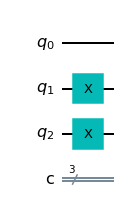

In [ ]:
def Init(qc, state = '000'):
  for i in range(len(state)):
    if state[i] == '1':
      qc.x(i)

qc=QuantumCircuit(3,3)
Init(qc,'011')
qc.draw(output='mpl')

### b. A sum over all states

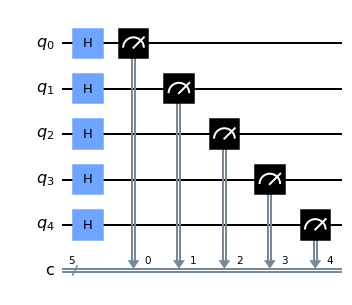

In [ ]:
def AllSum(qc, w):
  for i in range(w):
    qc.h(i)


w = 5
qc=QuantumCircuit(w,w)
AllSum(qc,w)
qc.measure(range(w),range(w))

qc.draw(output='mpl')


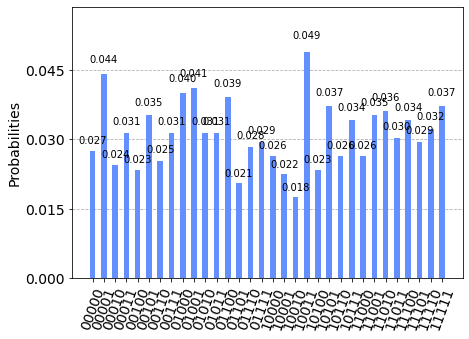

In [ ]:
results = RunMe(qc)
plot_histogram(results.get_counts())

### c.  Angle of a random gate

### d. Deferred Measurements

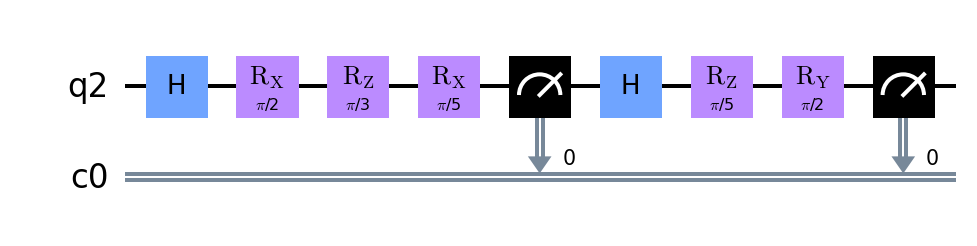

In [ ]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)
qc.h(0)
qc.rx(np.pi/2.,0)
qc.rz(np.pi/3.,0)
qc.rx(np.pi/5.,0)
qc.measure(0,0)
qc.h(0)
qc.rz(np.pi/5.,0)
qc.ry(np.pi/2.,0)
qc.measure(0,0)
qc.draw(output='mpl')

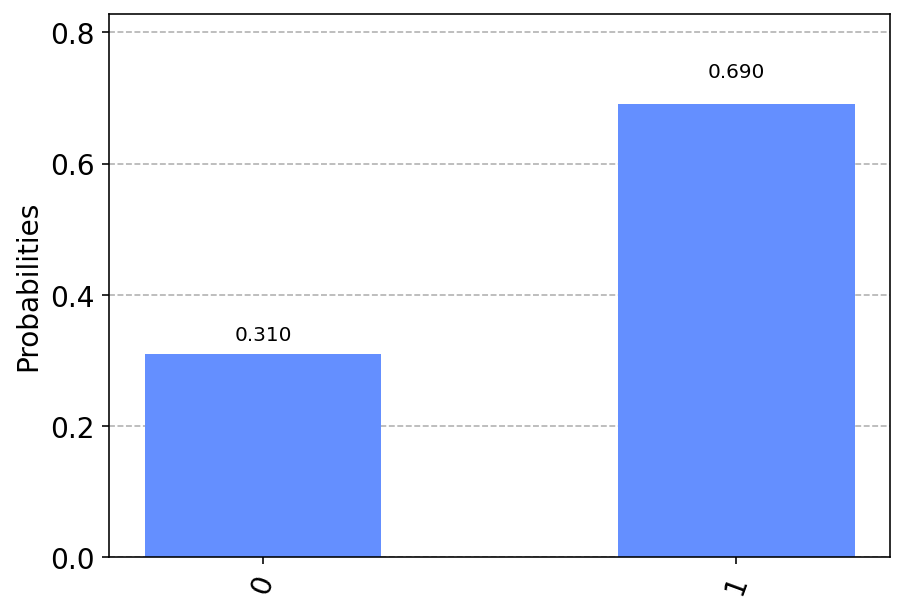

In [ ]:
plot_histogram(RunMe(qc).get_counts())

In [ ]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
qc.measure([0,1],[0,1])

qc.draw(output='mpl')